# Task 1 - Approximating functions

TODO: Possibly think of using cross validation to get best L and epsilon.
see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from helpers.data import load_linear_dataset, load_nonlinear_dataset
from helpers.models import RidgeRegression, RBFRegression
from helpers.plot import plot_pandas_dataset
from helpers.utils import augment_with_prediction

np.random.seed(69)

### 1 - Download and inspect the datasets

##### 1.1 linear dataset

In [2]:
df_linear = load_linear_dataset()
df_linear


,x,y
0,1.624345,1.218257
1,-0.611756,-0.458842
2,-0.528172,-0.396124
3,-1.072969,-0.804730
4,0.865408,0.649041
...,...,...
995,-0.116444,-0.087331
996,-2.277298,-1.707968
997,-0.069625,-0.052228
998,0.353870,0.265409


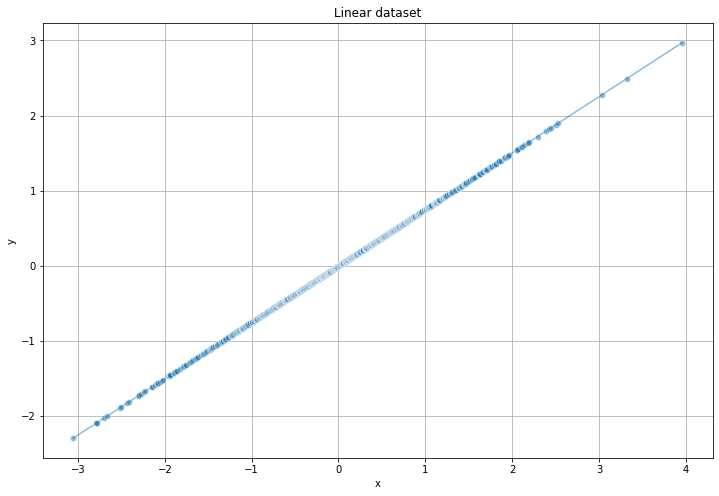

In [3]:
_ = plot_pandas_dataset(df_linear, "x", "y", "Linear dataset", x="x", y="y", marker="o", alpha=0.5)


##### 1.2 nonlinear dataset

In [4]:
df_nonlinear = load_nonlinear_dataset()
df_nonlinear


,x,y
0,1.624345,-1.732828
1,-0.611756,-0.709996
2,-0.528172,-0.630857
3,-1.072969,-0.330732
4,0.865408,0.399216
...,...,...
995,-0.116444,0.387484
996,-2.277298,-0.639435
997,-0.069625,0.535373
998,0.353870,1.443023


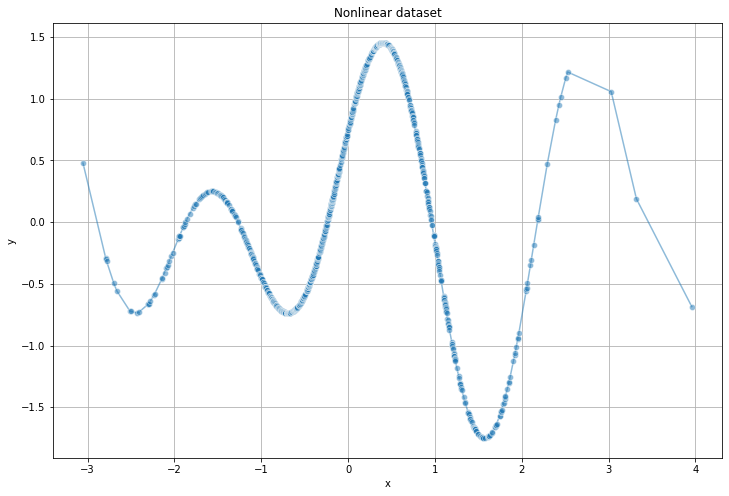

In [5]:
_ = plot_pandas_dataset(df_nonlinear, "x", "y", "Nonlinear dataset", x="x", y="y", marker="o", alpha=0.5)


### 2. Approximate both dataset with a linear regression model

##### 2.1 Linear dataset approximated with linear regression model

In [6]:
lamb = 1e-3
rr = RidgeRegression(lamb=lamb)
y_pred = rr.fit_transform(df_linear.x.values, df_linear.y.values)
df_linear_augmented = augment_with_prediction(df_linear, y_pred)
df_linear_augmented


,y,y_pred
x,,
1.624345,1.218257,1.218258
-0.611756,-0.458842,-0.458817
-0.528172,-0.396124,-0.396129
-1.072969,-0.804730,-0.804726
0.865408,0.649041,0.649055
...,...,...
-0.116444,-0.087331,-0.087333
-2.277298,-1.707968,-1.707972
-0.069625,-0.052228,-0.052218


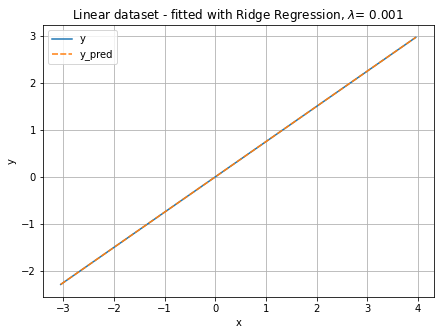

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Linear dataset - fitted with Ridge Regression, $\lambda$= {}".format(rr.lamb)
ax = plot_pandas_dataset(df_linear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_linear_dataset_linear_regression.pdf", bbox_inches="tight")


##### 2.2 Nonlinear dataset approximated with linear regression model

In [8]:
rr = RidgeRegression(lamb=lamb)
y_pred = rr.fit_transform(df_nonlinear.x.values, df_nonlinear.y.values)
df_nonlinear_augmented = augment_with_prediction(df_nonlinear, y_pred)
df_nonlinear_augmented


,y,y_pred
x,,
1.624345,-1.732828,0.053945
-0.611756,-0.709996,-0.020317
-0.528172,-0.630857,-0.017541
-1.072969,-0.330732,-0.035634
0.865408,0.399216,0.028740
...,...,...
-0.116444,0.387484,-0.003867
-2.277298,-0.639435,-0.075630
-0.069625,0.535373,-0.002312


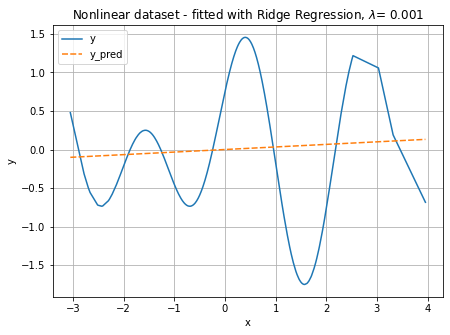

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Nonlinear dataset - fitted with Ridge Regression, $\lambda$= {}".format(rr.lamb)
ax = plot_pandas_dataset(df_nonlinear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_nonlinear_dataset_linear_regression.pdf", bbox_inches="tight")


### 3. Approximate both datasets with RBF regression

##### 3.1 Linear dataset approximated with RBF regression

In [10]:
rbf = RBFRegression(lamb=lamb, eps=1, L=1000)
y_pred = rbf.fit_transform(df_linear.x.values.reshape(-1, 1), df_linear.y.values)
df_linear_augmented = augment_with_prediction(df_linear, y_pred)
df_linear_augmented

,y,y_pred
x,,
1.624345,1.218257,1.216289
-0.611756,-0.458842,-0.460703
-0.528172,-0.396124,-0.397948
-1.072969,-0.804730,-0.801395
0.865408,0.649041,0.649758
...,...,...
-0.116444,-0.087331,-0.086166
-2.277298,-1.707968,-1.698808
-0.069625,-0.052228,-0.051017


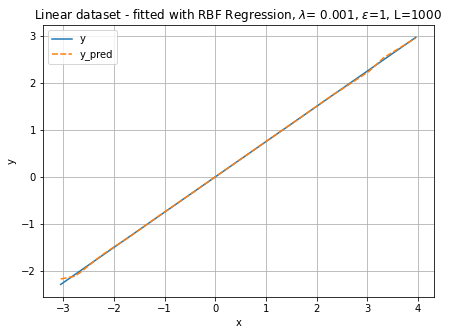

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Linear dataset - fitted with RBF Regression, $\lambda$= {}, $\epsilon$={}, L={}".format(
    lamb, rbf.eps, rbf.L
)
ax = plot_pandas_dataset(df_linear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_linear_dataset_rbf_regression.pdf", bbox_inches="tight")

##### 3.2 Nonlinear dataset approximated with RBF regression

In [12]:
rbf = RBFRegression(lamb=lamb, eps=1, L=1000)
y_pred = rbf.fit_transform(df_nonlinear.x.values.reshape(-1, 1), df_nonlinear.y.values)
df_nonlinear_augmented = augment_with_prediction(df_nonlinear, y_pred)
df_nonlinear_augmented


,y,y_pred
x,,
1.624345,-1.732828,-1.736286
-0.611756,-0.709996,-0.708196
-0.528172,-0.630857,-0.629507
-1.072969,-0.330732,-0.333460
0.865408,0.399216,0.398365
...,...,...
-0.116444,0.387484,0.386315
-2.277298,-0.639435,-0.645317
-0.069625,0.535373,0.534463


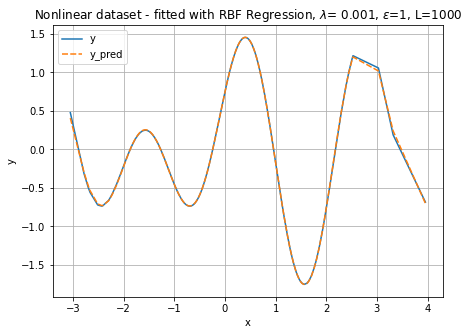

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Nonlinear dataset - fitted with RBF Regression, $\lambda$= {}, $\epsilon$={}, L={}".format(
    lamb, rbf.eps, rbf.L
)
ax = plot_pandas_dataset(df_nonlinear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_nonlinear_dataset_rbf_regression.pdf", bbox_inches="tight")
